In [1]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikeras
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d3db0cff70b28abf52e37d9b8aadd0b5a0d91706b2758663a1b2f6

In [2]:
from typing import List
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import random
from matplotlib import pyplot
from matplotlib.colors import ListedColormap

import os, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    LeaveOneOut,
    cross_val_score,
    train_test_split,
)

import requests

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Spaceship Titanic/kaggle.json" ~/.kaggle/
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           5961        142  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          12318        227  1.0              
emirhanai/city-happiness-index-2024                                City Happiness Index - 2024                          8KB  2024-01-22 00:41:50           1420         32  1.0              
shiivvvaam/revenue-of-top-companies-in-india      

In [5]:
DATA_PATH = "/content/drive/MyDrive/Spaceship Titanic/Dati/"
IMAGE_PATH = "/content/drive/MyDrive/Spaceship Titanic/Immagini/Tecniche di ML/"
OUTPUT_PATH = "kaggle_submissions/"

In [6]:
dataset_13 = pd.read_csv(DATA_PATH + "train_13.csv")
train_13, y_train_13 = dataset_13.drop(columns=['Unnamed: 0','Transported']), dataset_13.Transported
train_13

,gggg,Deck,Cabin_num,Side,HomePlanet,Destination,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,1,0,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,5,0,1,0,0,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,1,1,0,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,1,1,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,5,1,1,0,0,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,98,0,1,1,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,6,1499,1,0,2,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,6,1500,1,0,0,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,4,608,1,1,1,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [7]:
dataset_22 = pd.read_csv(DATA_PATH + "train_22.csv")
train_22, y_train_22 = dataset_22.drop(columns=['Unnamed: 0','Transported']), dataset_22.Transported
train_22

,gggg,Deck_B,Deck_C,Deck_E,Deck_F,Deck_G,Cabin_num,Side_P,Side_S,HomePlanet_Earth,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,1,0,0,0,1,1,...,0,0,1,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,0,0,0,1,0,1,0,1,1,...,0,0,1,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,0,0,0,0,98,1,0,0,...,1,0,0,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,0,0,0,0,1,1499,0,1,1,...,0,1,0,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,0,0,0,0,1,1500,0,1,1,...,0,0,1,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,0,0,1,0,0,608,0,1,0,...,1,0,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [8]:
skf = StratifiedKFold(n_splits=10)
cross_validation_13 = skf.get_n_splits(train_13, y_train_13)
cross_validation_22 = skf.get_n_splits(train_22, y_train_22)

VOTING con Random Forest, Logistic Regression e Gradient Boosting

In [24]:
# best scores in kaggle
# rfc: 79261, lgr: 78676, grb: 0.79798

rfc_13 = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=8, min_samples_leaf=12, min_samples_split=20, random_state=42,
                                warm_start=True, max_features=5, max_samples=700)
lgr_13 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=10000, C=1.1, intercept_scaling=3, warm_start=True)
grb_13 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.11, subsample=0.95, max_features=10, min_samples_split=12, min_samples_leaf=5)

In [28]:
voting_grb_13 = VotingClassifier(estimators=[('rfc_13', rfc_13), ('lgr_13', lgr_13), ('grb_13', grb_13)], weights=[1,1,1])

scores = cross_val_score(voting_grb_13, train_13, y_train_13, cv=cross_validation_13)
print("Accuratezza per ogni singolo sottoinsieme di train_13 per Voting con GB: ")
print(scores)
print("\nAccuratezza media per train_13 per Voting con GB: ")
print(scores.mean())

voting_grb_13.fit(train_13, y_train_13)

Accuratezza per ogni singolo sottoinsieme di train_13 per Voting con GB: 
[0.80344828 0.75862069 0.7816092  0.79631761 0.78020713 0.80437284
 0.81818182 0.81357883 0.8273878  0.77905639]

Accuratezza media per train_13 per Voting con GB: 
0.796278057749031


VotingClassifier(estimators=[('rfc_13',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features=5,
                                                     max_samples=700,
                                                     min_samples_leaf=12,
                                                     min_samples_split=20,
                                                     n_estimators=250,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_13',
                              LogisticRegression(C=1.1, intercept_scaling=3,
                                                 max_iter=10000, penalty='l1',
                                                 solver='liblinear',
                                                 warm_start=True)),
                             ('grb_13',
                              GradientBoostingClassifier(learning_rate=0.11,
                                                         max_features=10,
                                                         min_samples_leaf=5,
                                                         min_samples_split=12,
                                                         n_estimators=30,
                                                         subsample=0.95))],
                 weights=[1, 1, 1])

In [25]:
# best scores in kaggle
# rfc: 0.79424, lgr: 0.79752, grb: 0.79845

rfc_22 = RandomForestClassifier(n_estimators=450, criterion='gini', max_depth=5, min_samples_leaf=8, min_samples_split=20,
                                random_state=42, warm_start=True, max_features=10, max_samples=1650)
lgr_22 = LogisticRegression(solver='liblinear', penalty='l2', max_iter=10000, tol=0.001, C=1.9, warm_start=True)
grb_22 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, subsample=0.95, max_features=11, min_samples_split=3, min_samples_leaf=4)

In [30]:
voting_grb_22 = VotingClassifier(estimators=[('rfc_22', rfc_22), ('lgr_22', lgr_22), ('grb_22,', grb_22)], weights=[1,1,1])

scores = cross_val_score(voting_grb_22, train_22, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di train_22 per Voting con GB: ")
print(scores)
print("\nAccuratezza media per train_22 per Voting con GB: ")
print(scores.mean())

voting_grb_22.fit(train_22, y_train_22)

Accuratezza per ogni singolo sottoinsieme di train_22 per Voting con GB: 
[0.79885057 0.76321839 0.77816092 0.78596087 0.77790564 0.80207135
 0.81242808 0.81242808 0.81933257 0.79056387]

Accuratezza media per train_22 per Voting con GB: 
0.7940920333849186


VotingClassifier(estimators=[('rfc_22',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=10,
                                                     max_samples=1650,
                                                     min_samples_leaf=8,
                                                     min_samples_split=20,
                                                     n_estimators=450,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_22',
                              LogisticRegression(C=1.9, max_iter=10000,
                                                 solver='liblinear', tol=0.001,
                                                 warm_start=True)),
                             ('grb_22,',
                              GradientBoostingClassifier(max_features=11,
                                                         min_samples_leaf=4,
                                                         min_samples_split=3,
                                                         n_estimators=30,
                                                         subsample=0.95))],
                 weights=[1, 1, 1])

In [34]:
# best scores in kaggle
# rfc: 79471, lgr: 79401, grb: 0.79635

train_14 = train_13.copy()
train_14['Service_use'] = 0
train_14['Service_use']  = train_14['VRDeck'] + train_14['RoomService'] + train_14['FoodCourt'] + train_14['ShoppingMall'] + train_14['Spa'] != 0.0
train_14['Service_use'] = train_14['Service_use'].astype(int)

voting_grb_14 = VotingClassifier(estimators=[('rfc_13', rfc_13), ('lgr_13', lgr_13),  ('grb_13', grb_13)], weights=[1,1,1])

scores = cross_val_score(voting_grb_14, train_14, y_train_13, cv=cross_validation_13)
print("Accuratezza per ogni singolo sottoinsieme di train_13 + Service_use per Voting con GB: ")
print(scores)
print("\nAccuratezza media train_13 + Service_use per Voting con GB: ")
print(scores.mean())

voting_grb_14.fit(train_14, y_train_13)

Accuratezza per ogni singolo sottoinsieme di train_13 + Service_use per Voting con GB: 
[0.79195402 0.75747126 0.77816092 0.79056387 0.77675489 0.81127733
 0.81357883 0.81472957 0.81588032 0.78365938]

Accuratezza media train_13 + Service_use per Voting con GB: 
0.793403039561922


VotingClassifier(estimators=[('rfc_13',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features=5,
                                                     max_samples=700,
                                                     min_samples_leaf=12,
                                                     min_samples_split=20,
                                                     n_estimators=250,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_13',
                              LogisticRegression(C=1.1, intercept_scaling=3,
                                                 max_iter=10000, penalty='l1',
                                                 solver='liblinear',
                                                 warm_start=True)),
                             ('grb_13',
                              GradientBoostingClassifier(learning_rate=0.11,
                                                         max_features=10,
                                                         min_samples_leaf=5,
                                                         min_samples_split=12,
                                                         n_estimators=30,
                                                         subsample=0.95))],
                 weights=[1, 1, 1])

In [40]:
# best scores in kaggle
# rfc: 79471, lgr: 79401, grb: 79424

train_15 = train_14.copy()
train_15['Expenses']  = train_15['VRDeck'] + train_15['RoomService'] + train_15['FoodCourt'] + train_15['ShoppingMall'] + train_15['Spa']

voting_grb_15 = VotingClassifier(estimators=[('rfc_13', rfc_13), ('lgr_13', lgr_13),  ('grb_13', grb_13)], weights=[1,1,1])

scores = cross_val_score(voting_grb_15, train_15, y_train_13, cv=cross_validation_13)
print("\nAccuratezza per ogni singolo sottoinsieme di train_13 + Service_use ed Expenses per Voting GB: ")
print(scores)
print("\nAccuratezza media di train_13 + Service_use ed Expenses per Voting GB: ")
print(scores.mean())

voting_grb_15.fit(train_15, y_train_13)


Accuratezza per ogni singolo sottoinsieme di train_13 + Service_use ed Expenses per Voting GB: 
[0.7954023  0.76436782 0.77471264 0.78481013 0.77905639 0.80782509
 0.81242808 0.81703107 0.81242808 0.78711162]

Accuratezza media di train_13 + Service_use ed Expenses per Voting GB: 
0.7935173207412405


VotingClassifier(estimators=[('rfc_13',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features=5,
                                                     max_samples=700,
                                                     min_samples_leaf=12,
                                                     min_samples_split=20,
                                                     n_estimators=250,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_13',
                              LogisticRegression(C=1.1, intercept_scaling=3,
                                                 max_iter=10000, penalty='l1',
                                                 solver='liblinear',
                                                 warm_start=True)),
                             ('grb_13',
                              GradientBoostingClassifier(learning_rate=0.11,
                                                         max_features=10,
                                                         min_samples_leaf=5,
                                                         min_samples_split=12,
                                                         n_estimators=30,
                                                         subsample=0.95))],
                 weights=[1, 1, 1])

In [45]:
# best scores in kaggle
# rfc: 79261, lgr: 79424, grb: 79565

train_23 = train_22.copy()
train_23['Service_use'] = 0
train_23['Service_use']  = train_23['VRDeck'] + train_23['RoomService'] + train_23['FoodCourt'] + train_23['ShoppingMall'] + train_23['Spa'] != 0.0
train_23['Service_use'] = train_23['Service_use'].astype(int)

voting_grb_23 = VotingClassifier(estimators=[('rfc_22', rfc_22), ('lgr_22', lgr_22),  ('grb_22', grb_22)], weights=[1,1,1])

scores = cross_val_score(voting_grb_23, train_23, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di train_22 + Service_use per Voting con GB: ")
print(scores)
print("\nAccuratezza media di train_22 + Service_use per Voting con GB: ")
print(scores.mean())

voting_grb_23.fit(train_23, y_train_22)

Accuratezza per ogni singolo sottoinsieme di train_22 + Service_use per Voting con GB: 
[0.8        0.76781609 0.77816092 0.78596087 0.77560414 0.80207135
 0.79976985 0.81357883 0.80667434 0.78250863]

Accuratezza media di train_22 + Service_use per Voting con GB: 
0.7912145020700238


VotingClassifier(estimators=[('rfc_22',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=10,
                                                     max_samples=1650,
                                                     min_samples_leaf=8,
                                                     min_samples_split=20,
                                                     n_estimators=450,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_22',
                              LogisticRegression(C=1.9, max_iter=10000,
                                                 solver='liblinear', tol=0.001,
                                                 warm_start=True)),
                             ('grb_22',
                              GradientBoostingClassifier(max_features=11,
                                                         min_samples_leaf=4,
                                                         min_samples_split=3,
                                                         n_estimators=30,
                                                         subsample=0.95))],
                 weights=[1, 1, 1])

In [51]:
# best scores in kaggle
# rfc: 7912, lgr: 79448, grb: 79354

train_24 = train_23.copy()
train_24['Expenses']  = train_24['VRDeck'] + train_24['RoomService'] + train_24['FoodCourt'] + train_24['ShoppingMall'] + train_24['Spa']

voting_grb_24 = VotingClassifier(estimators=[('rfc_22', rfc_22), ('lgr_22', lgr_22),  ('grb_22', grb_22)], weights=[1,2,2])

scores = cross_val_score(voting_grb_24, train_24, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di train_22 + Service_use ed Expenses per Voting con GB: ")
print(scores)
print("\nAccuratezza media di train_22 + Service_use ed Expenses per Voting con GB: ")
print(scores.mean())

voting_grb_24.fit(train_24, y_train_22)

Accuratezza per ogni singolo sottoinsieme di train_22 + Service_use ed Expenses per Voting con GB: 
[0.7954023  0.75402299 0.78045977 0.78365938 0.76869965 0.80322209
 0.7986191  0.81127733 0.81012658 0.78481013]

Accuratezza media di train_22 + Service_use ed Expenses per Voting con GB: 
0.7890299326746293


VotingClassifier(estimators=[('rfc_22',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=10,
                                                     max_samples=1650,
                                                     min_samples_leaf=8,
                                                     min_samples_split=20,
                                                     n_estimators=450,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_22',
                              LogisticRegression(C=1.9, max_iter=10000,
                                                 solver='liblinear', tol=0.001,
                                                 warm_start=True)),
                             ('grb_22',
                              GradientBoostingClassifier(max_features=11,
                                                         min_samples_leaf=4,
                                                         min_samples_split=3,
                                                         n_estimators=30,
                                                         subsample=0.95))],
                 weights=[1, 2, 2])

VOTING con Random Forest, Logistic Regression e Support Vector Classification

In [ ]:
# best scores in kaggle
# rfc: 79261, lgr: 78676, svc: 79144

rfc_13 = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=8, min_samples_leaf=12, min_samples_split=20, random_state=42,
                                warm_start=True, max_features=5, max_samples=700)
lgr_13 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=10000, C=1.1, intercept_scaling=3, warm_start=True)
svc_13 = NuSVC(kernel='rbf', nu=0.47)

In [ ]:
voting_svc_13 = VotingClassifier(estimators=[('rfc_13', rfc_13), ('lgr_13', lgr_13),  ('svc_13', svc_13)], weights=[2,1,2])

scores = cross_val_score(voting_svc_13, train_13, y_train_13, cv=cross_validation_13)
print("Accuratezza per ogni singolo sottoinsieme di train_13 per Voting con SVC: ")
print(scores)
print("\nAccuratezza media di train_13 per Voting con SVC: ")
print(scores.mean())

voting_svc_13.fit(train_13, y_train_13)

Accuratezza default Logistic Regression 13 per ogni singolo sottoinsieme di training: 
[0.80804598 0.76091954 0.78505747 0.80207135 0.77330265 0.81472957
 0.80897583 0.80552359 0.82393556 0.79516686]

Accuratezza media default Logistic Regression 13: 
0.7977728397021283


VotingClassifier(estimators=[('rfc_13',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features=5,
                                                     max_samples=700,
                                                     min_samples_leaf=12,
                                                     min_samples_split=20,
                                                     n_estimators=250,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_13',
                              LogisticRegression(C=1.1, intercept_scaling=3,
                                                 max_iter=10000, penalty='l1',
                                                 solver='liblinear',
                                                 warm_start=True)),
                             ('svc_13', NuSVC(nu=0.47))],
                 weights=[2, 1, 2])

In [ ]:
# best scores in kaggle
# rfc: 0.79424, lgr: 0.79752, svc: 0.79022, grb: 0.79845

rfc_22 = RandomForestClassifier(n_estimators=450, criterion='gini', max_depth=5, min_samples_leaf=8, min_samples_split=20,
                                random_state=42, warm_start=True, max_features=10, max_samples=1650)
lgr_22 = LogisticRegression(solver='liblinear', penalty='l2', max_iter=10000, tol=0.001, C=1.9, warm_start=True)
svc_22 = NuSVC(kernel='rbf', nu=0.47)
grb_22 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, subsample=0.95, max_features=11, min_samples_split=3, min_samples_leaf=4)

In [ ]:
voting_svc_22 = VotingClassifier(estimators=[('rfc_22', rfc_22), ('lgr_22', lgr_22), ('svc_22', svc_22)], weights=[1,2,1])

scores = cross_val_score(voting_svc_22, train_22, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di train_22 per Voting con SVC: ")
print(scores)
print("\nAccuratezza media di train_22 per Voting con SVC: ")
print(scores.mean())

voting_svc_22.fit(train_22, y_train_22)

Accuratezza default Logistic Regression 13 per ogni singolo sottoinsieme di training: 
[0.8045977  0.76091954 0.78045977 0.79746835 0.79286536 0.81472957
 0.82048331 0.79746835 0.83084005 0.79171461]

Accuratezza media default Logistic Regression 13: 
0.7991546631747417


VotingClassifier(estimators=[('rfc_22',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=10,
                                                     max_samples=1650,
                                                     min_samples_leaf=8,
                                                     min_samples_split=20,
                                                     n_estimators=450,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_22',
                              LogisticRegression(C=1.9, max_iter=10000,
                                                 solver='liblinear', tol=0.001,
                                                 warm_start=True)),
                             ('svc_22', NuSVC(nu=0.47))],
                 weights=[1, 2, 1])

In [ ]:
# best scores in kaggle
# rfc: 79471, lgr: 79401, svc: 79074

train_14 = train_13.copy()
train_14['Service_use'] = 0
train_14['Service_use']  = train_14['VRDeck'] + train_14['RoomService'] + train_14['FoodCourt'] + train_14['ShoppingMall'] + train_14['Spa'] != 0.0
train_14['Service_use'] = train_14['Service_use'].astype(int)

voting_svc_14 = VotingClassifier(estimators=[('rfc_13', rfc_13), ('lgr_13', lgr_13), ('svc_13', svc_13)], weights=[1,1,1])

scores = cross_val_score(voting_svc_14, train_14, y_train_13, cv=cross_validation_13)
print("Accuratezza per ogni singolo sottoinsieme di train_13 + Service_use per Voting con SVC: ")
print(scores)
print("\nAccuratezza media di train_13 + Service_use per Voting con SVC: ")
print(scores.mean())

voting_svc_14.fit(train_14, y_train_13)

Accuratezza default Logistic Regression 13 per ogni singolo sottoinsieme di training: 
[0.79655172 0.76896552 0.78275862 0.79286536 0.78020713 0.81818182
 0.81472957 0.80667434 0.81933257 0.79171461]

Accuratezza media default Logistic Regression 13: 
0.7971981270584501


VotingClassifier(estimators=[('rfc_14',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features=5,
                                                     max_samples=700,
                                                     min_samples_leaf=12,
                                                     min_samples_split=20,
                                                     n_estimators=250,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_14',
                              LogisticRegression(C=1.1, intercept_scaling=3,
                                                 max_iter=10000, penalty='l1',
                                                 solver='liblinear',
                                                 warm_start=True)),
                             ('svc_14', NuSVC(nu=0.47))],
                 weights=[1, 1, 1])

In [ ]:
# best scores in kaggle
# rfc: 79471, lgr: 79401, svc: 79261

train_15 = train_14.copy()
train_15['Expenses']  = train_15['VRDeck'] + train_15['RoomService'] + train_15['FoodCourt'] + train_15['ShoppingMall'] + train_15['Spa']

voting_svc_15 = VotingClassifier(estimators=[('rfc_13', rfc_13), ('lgr_13', lgr_13), ('svc_13', svc_13)], weights=[1,2,2])

scores = cross_val_score(voting_svc_15, train_15, y_train_13, cv=cross_validation_13)
print("\nAccuratezza per ogni singolo sottoinsieme di train_13 + Service_use ed Expenses per Voting con SVC: ")
print(scores)
print("\nAccuratezza media di train_13 + Service_use ed Expenses per Voting con SVC:: ")
print(scores.mean())

voting_svc_15.fit(train_15, y_train_13)


Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: 
[0.79425287 0.76781609 0.78505747 0.79401611 0.77675489 0.81012658
 0.81472957 0.80782509 0.81818182 0.79516686]

Accuratezza media con aggiunta di Service_use ed Expenses: 
0.796392735738


VotingClassifier(estimators=[('rfc_15',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features=5,
                                                     max_samples=700,
                                                     min_samples_leaf=12,
                                                     min_samples_split=20,
                                                     n_estimators=250,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_15',
                              LogisticRegression(C=1.1, intercept_scaling=3,
                                                 max_iter=10000, penalty='l1',
                                                 solver='liblinear',
                                                 warm_start=True)),
                             ('svc_15', NuSVC(nu=0.47))],
                 weights=[1, 2, 2])

In [ ]:
# best scores in kaggle
# rfc: 79261, lgr: 79424, svc: 7905

train_23 = train_22.copy()
train_23['Service_use'] = 0
train_23['Service_use']  = train_23['VRDeck'] + train_23['RoomService'] + train_23['FoodCourt'] + train_23['ShoppingMall'] + train_23['Spa'] != 0.0
train_23['Service_use'] = train_23['Service_use'].astype(int)

voting_svc_23 = VotingClassifier(estimators=[('rfc_22', rfc_22), ('lgr_22', lgr_22), ('svc_22', svc_22)], weights=[2,2,1])

scores = cross_val_score(voting_svc_23, train_23, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di train_22 + Service_use per Voting con SVC: ")
print(scores)
print("\nAccuratezza media di train_22 + Service_use per Voting con SVC: ")
print(scores.mean())

voting_svc_23.fit(train_23, y_train_22)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.80574713 0.77011494 0.7908046  0.79516686 0.78250863 0.80782509
 0.80322209 0.80667434 0.81703107 0.78481013]

Accuratezza media con aggiunta di Service_use: 
0.7963904871499807


VotingClassifier(estimators=[('rfc_23',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=10,
                                                     max_samples=1650,
                                                     min_samples_leaf=8,
                                                     min_samples_split=20,
                                                     n_estimators=450,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_23',
                              LogisticRegression(C=1.9, max_iter=10000,
                                                 solver='liblinear', tol=0.001,
                                                 warm_start=True)),
                             ('svc_23', NuSVC(nu=0.47))],
                 weights=[2, 2, 1])

In [ ]:
# best scores in kaggle
# rfc: 7912, lgr: 79448, svc: 79307

train_24 = train_23.copy()
train_24['Expenses']  = train_24['VRDeck'] + train_24['RoomService'] + train_24['FoodCourt'] + train_24['ShoppingMall'] + train_24['Spa']

voting_svc_24 = VotingClassifier(estimators=[('rfc_22', rfc_22), ('lgr_22', lgr_22), ('svc_22', svc_22)], weights=[1,2,2])

scores = cross_val_score(voting_svc_24, train_24, y_train_22, cv=cross_validation_22)
print("Accuratezza per ogni singolo sottoinsieme di train_22 + Service_use ed Expenses per Voting con SVC: ")
print(scores)
print("\nAccuratezza media di train_22 + Service_use ed Expenses per Voting con SVC: ")
print(scores.mean())

voting_svc_24.fit(train_24, y_train_22)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.79770115 0.76551724 0.78390805 0.78250863 0.76179517 0.80437284
 0.80437284 0.80437284 0.81703107 0.79631761]

Accuratezza media con aggiunta di Service_use: 
0.7917897437932356


VotingClassifier(estimators=[('rfc_24',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=10,
                                                     max_samples=1650,
                                                     min_samples_leaf=8,
                                                     min_samples_split=20,
                                                     n_estimators=450,
                                                     random_state=42,
                                                     warm_start=True)),
                             ('lgr_24',
                              LogisticRegression(C=1.9, max_iter=10000,
                                                 solver='liblinear', tol=0.001,
                                                 warm_start=True)),
                             ('svc_24', NuSVC(nu=0.47))],
                 weights=[1, 2, 2])

KAGGLE SUBMISSION

In [55]:
def generateSubmission(myModel, testFile, add_service_use, add_expenses, submissionFile, description):
    # Read the test data
    X_test = pd.read_csv(DATA_PATH + testFile)
    Id = X_test.PassengerId
    X_test = X_test.drop(columns=['Unnamed: 0', 'PassengerId'])

    if(add_service_use):
      X_test['Service_use'] = 0
      X_test['Service_use']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa'] != 0.0
      X_test['Service_use'] = X_test['Service_use'].astype(int)
    if(add_expenses):
      X_test['Expenses']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa']

    # Use the model to make predictions
    y_test_pred = myModel.predict(X_test)
    for i in range(0,len(y_test_pred)-1):
      if(y_test_pred[i] > 0.5):
        y_test_pred[i] = 1
      else:
        y_test_pred[i] = 0

    y_test_pred = y_test_pred.astype(bool).reshape(len(y_test_pred))

    # submission file
    my_submission = pd.DataFrame({"PassengerId": Id, "Transported": y_test_pred})

    if not os.path.exists(OUTPUT_PATH):
      os.mkdir(OUTPUT_PATH)

    # you could use any filename. We choose submission here
    my_submission.to_csv(OUTPUT_PATH + submissionFile, index=False)

    # Submit authomatically; kaggle API authentication needed
    !kaggle competitions submit -c spaceship-titanic -f {OUTPUT_PATH + submissionFile} -m '{description}'

In [62]:
generateSubmission(voting_grb_24, "test_22.csv", True, True, "Voting_grb_6.csv", "Miglior configurazione trovata per il training con 22 attributi + Expenses")

100% 56.3k/56.3k [00:00<00:00, 79.0kB/s]
Successfully submitted to Spaceship Titanic

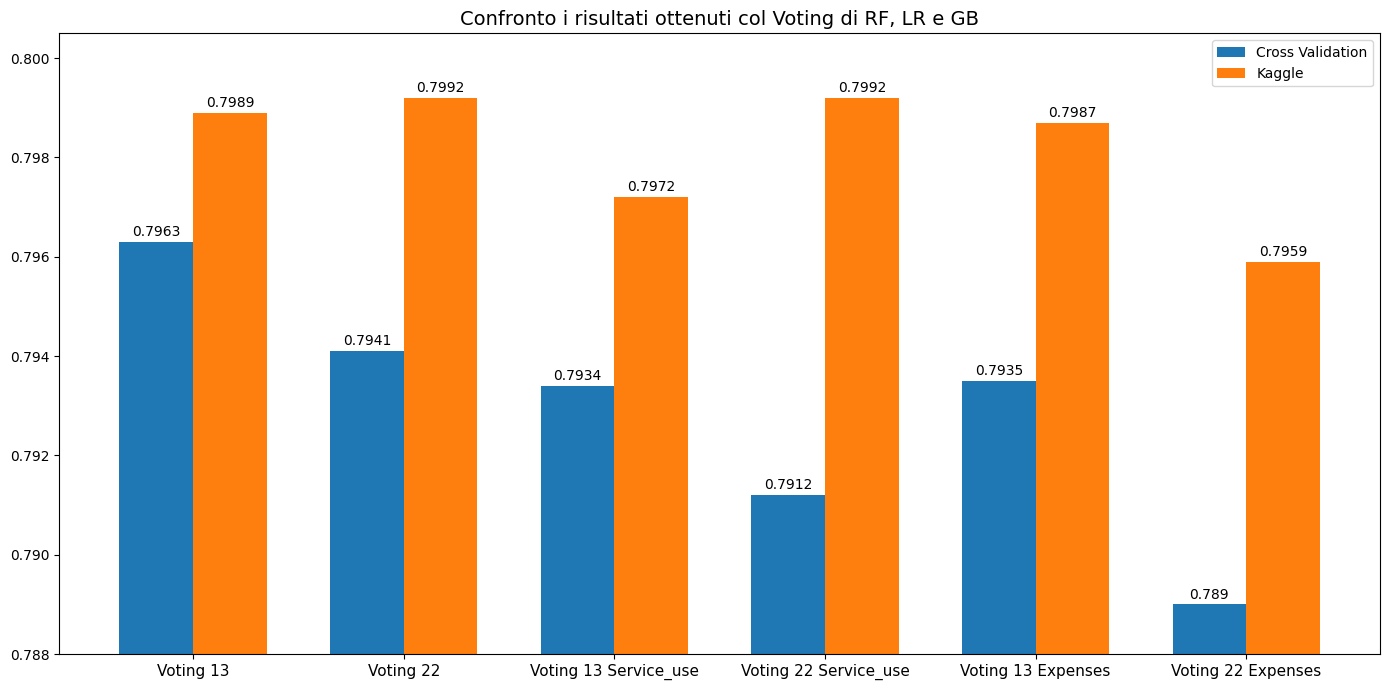

In [69]:
classifers = ('Voting 13', 'Voting 22', 'Voting 13 Service_use', 'Voting 22 Service_use', 'Voting 13 Expenses', 'Voting 22 Expenses',)
scores = {
    'Cross Validation': (0.7963, 0.7941, 0.7934, 0.7912, 0.7935, 0.7890),
    'Kaggle': (0.7989, 0.7992, 0.7972, 0.7992, 0.7987, 0.7959)
}

x = np.arange(len(classifers))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7))

for attribute, score in scores.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, score, width, label=attribute)
  ax.bar_label(rects, padding=2)
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Confronto i risultati ottenuti col Voting di RF, LR e GB', fontsize=14)
ax.set_ylim(0.7880, 0.8005)
ax.set_xticks(x + width/2, classifers, fontsize=11)
ax.legend(loc='upper right')

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "V_Risultati_GB.png")):
  plt.savefig(IMAGE_PATH + "V_Risultati_GB.png", format="png")

plt.show()

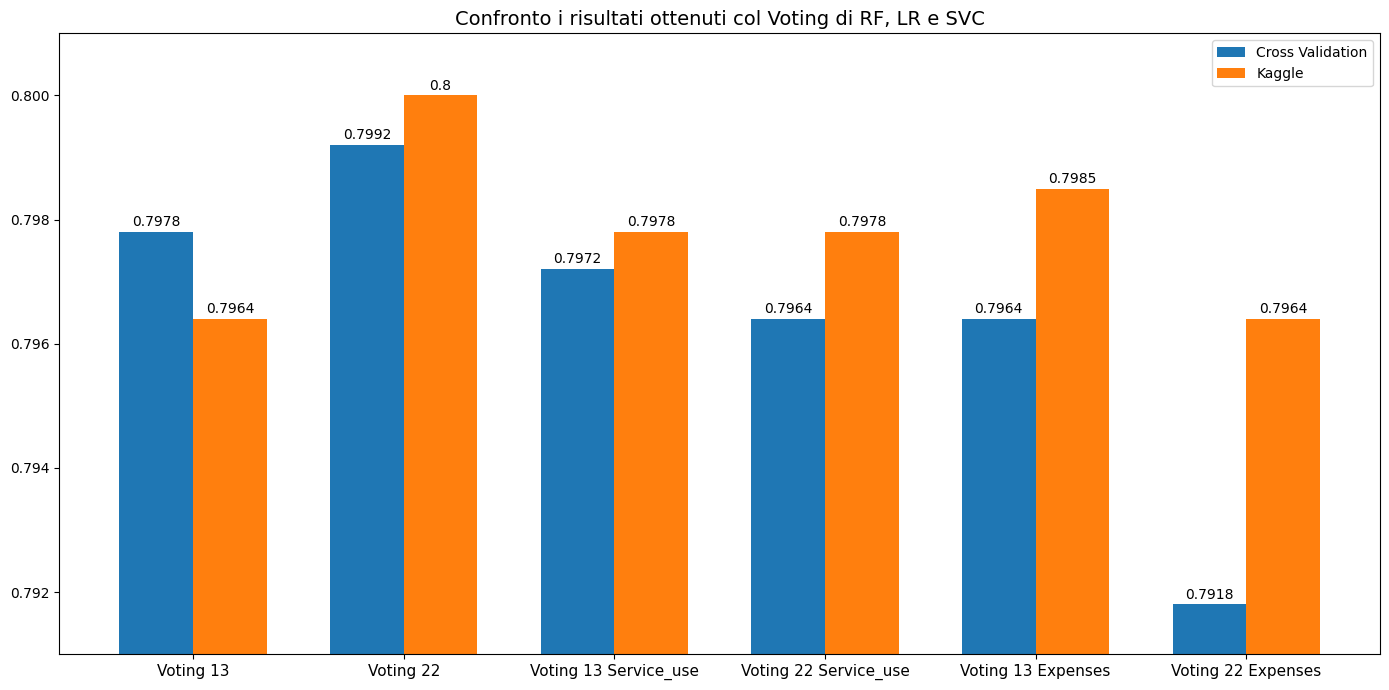

In [70]:
classifers = ('Voting 13', 'Voting 22', 'Voting 13 Service_use', 'Voting 22 Service_use', 'Voting 13 Expenses', 'Voting 22 Expenses',)
scores = {
    'Cross Validation': (0.7978, 0.7992, 0.7972, 0.7964, 0.7964, 0.7918),
    'Kaggle': (0.7964, 0.8000, 0.7978, 0.7978, 0.7985, 0.7964)
}

x = np.arange(len(classifers))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7))

for attribute, score in scores.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, score, width, label=attribute)
  ax.bar_label(rects, padding=2)
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Confronto i risultati ottenuti col Voting di RF, LR e SVC', fontsize=14)
ax.set_ylim(0.7910, 0.8010)
ax.set_xticks(x + width/2, classifers, fontsize=11)
ax.legend(loc='upper right')

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "V_Risultati_SVC.png")):
  plt.savefig(IMAGE_PATH + "V_Risultati_SVC.png", format="png")

plt.show()

# CONCLUSIONI

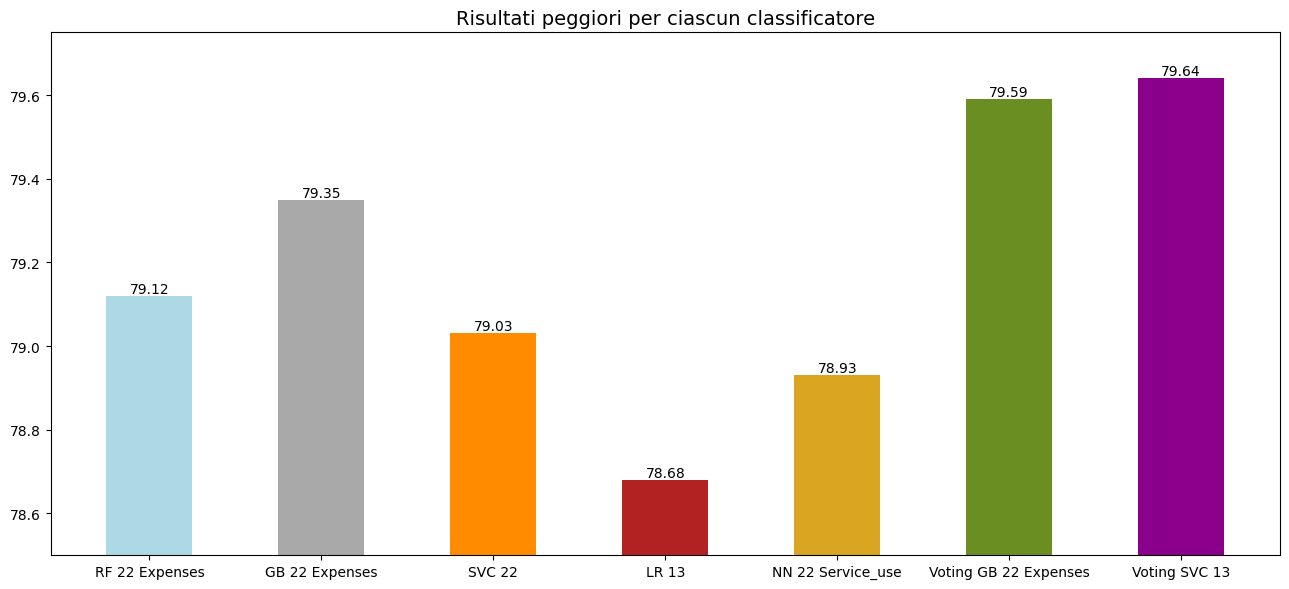

In [83]:
#risultati peggiori di ogni classificatore

risultati_peggiori=pd.DataFrame(data=[('RF 22 Expenses', 79.12),
                                      ('GB 22 Expenses', 79.35),
                                      ('SVC 22', 79.03),
                                      ('LR 13', 78.68),
                                      ('NN 22 Service_use', 78.93),
                                      ('Voting GB 22 Expenses', 79.59),
                                      ('Voting SVC 13', 79.64),],
                                columns=['Classificatore','Accuratezza'])

color = ['lightblue', 'darkgrey', 'darkorange', 'firebrick', 'goldenrod', 'olivedrab', 'darkmagenta']
fig, ax = plt.subplots(figsize=(13,6))
bar_container = ax.bar(risultati_peggiori.Classificatore, risultati_peggiori.Accuratezza, width=0.5, color=color)
ax.set_title(label='Risultati peggiori per ciascun classificatore', fontsize=14)
ax.set_ylim(78.50, 79.75)
ax.bar_label(bar_container)

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Risultati_peggiori.png")):
  plt.savefig(IMAGE_PATH + "Risultati_peggiori.png", format="png")
plt.show()

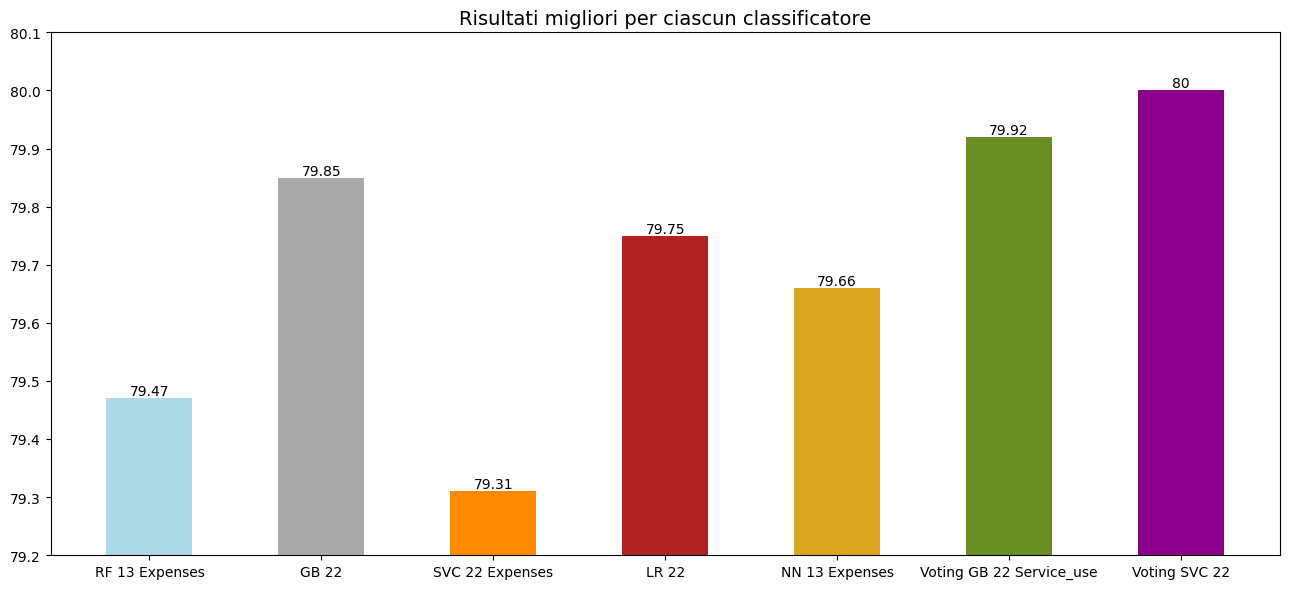

In [85]:
#risultati migliori di ogni classificatore

risultati_migliori=pd.DataFrame(data=[('RF 13 Expenses', 79.47),
                                      ('GB 22', 79.85),
                                      ('SVC 22 Expenses', 79.31),
                                      ('LR 22', 79.75),
                                      ('NN 13 Expenses', 79.66),
                                      ('Voting GB 22 Service_use', 79.92),
                                      ('Voting SVC 22', 80.00),],
                                columns=['Classificatore','Accuratezza'])

color = ['lightblue', 'darkgrey', 'darkorange', 'firebrick', 'goldenrod', 'olivedrab', 'darkmagenta']
fig, ax = plt.subplots(figsize=(13,6))
bar_container = ax.bar(risultati_migliori.Classificatore, risultati_migliori.Accuratezza, width=0.5, color=color)
ax.set_title(label='Risultati migliori per ciascun classificatore', fontsize=14)
ax.set_ylim(79.20, 80.10)
ax.bar_label(bar_container)

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Risultati_migliori.png")):
  plt.savefig(IMAGE_PATH + "Risultati_migliori.png", format="png")
plt.show()